# Limpeza e preparação dos dados
---
   
Durante a análise e a modelagem dos dados, um período significativo de tempo é gasto em sua preparação: carga, limpeza, transformação e reorganização. Sabe-se que essas tarefas em geral ocupam 80% ou mais do tempo de um analista.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Tratando dados ausentes
---

Dados ausentes são comuns em muitas aplicações de analise de dados. São representados, no pandas, por **NaN**

In [12]:
string_data = pd.Series(['aardvark', 'artichoke', np.nan, 'avocado'])
string_data

0     aardvark
1    artichoke
2          NaN
3      avocado
dtype: object

* O método [isnull](https://pandas.pydata.org/docs/reference/api/pandas.isnull.html) retorna uma Series/DataFrame booleano

In [13]:
string_data.isnull() # retorna uma Series/DataFrame booleano, por padrão nulo == True e não nulo == False

0    False
1    False
2     True
3    False
dtype: bool

In [7]:
~string_data.isnull() # ~ -> indica a negação

0     True
1     True
2    False
3     True
dtype: bool

* O valor embutido **None** de Python é tratado como NA em arrays de objetos:

In [9]:
string_data[0] = None
string_data

0         None
1    artichoke
2          NaN
3      avocado
dtype: object

In [10]:
string_data.isnull()

0     True
1    False
2     True
3    False
dtype: bool

In [11]:
string_data.notnull() # retorna True para valores não nulos

0    False
1     True
2    False
3     True
dtype: bool


    
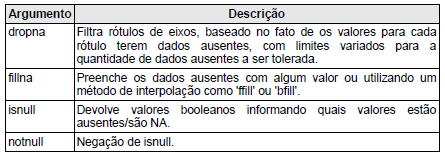 



## Filtrando dados ausentes
---

In [16]:
from numpy import nan as NA

In [18]:
data = pd.Series([1,NA,3.5,NA,7])
data

0    1.0
1    NaN
2    3.5
3    NaN
4    7.0
dtype: float64

* Utilizando o [dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html):

In [19]:
data.dropna()

0    1.0
2    3.5
4    7.0
dtype: float64

In [20]:
data[data.notnull()] # é equivalente expressão acima

0    1.0
2    3.5
4    7.0
dtype: float64

* Com objetos DataFrame, a situação é um pouco mais complexa. Talvez você queira descartar linhas ou colunas que contenham somente NA ou apenas aquelas que contenham algum NA. Por padrão, dropna descarta qualquer linha contendo um valor ausente.

In [23]:
data = pd.DataFrame([[1., 6.5, 3.], [1., NA, NA], [NA, NA, NA], [NA, 6.5, 3.]])
data

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [26]:
cleaned = data.dropna()
cleaned

,0,1,2
0,1.0,6.5,3.0


* Passar o `how='all'` descartará apena as colunas que contenham somente NAs

In [27]:
data.dropna(how='all')

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
3,NaN,6.5,3.0


* Para descartar colunas do mesmo modo, passe `axis=1`:

In [29]:
data.dropna(how='all',axis=1) # não exclui, pois nenhuma coluna contém todos os valores NAs

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


In [34]:
data[4] = NA # adicionando a coluna NA

In [31]:
data

,0,1,2,4
0,1.0,6.5,3.0,NaN
1,1.0,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,6.5,3.0,NaN


In [33]:
data.dropna(how='all', axis=1)

,0,1,2
0,1.0,6.5,3.0
1,1.0,NaN,NaN
2,NaN,NaN,NaN
3,NaN,6.5,3.0


* Um modo relacionado de filtrar linhas de DataFrame diz respeito a
dados de séries temporais. Suponha que queremos manter somente
as linhas contendo determinado número de observações. Podemos
representar isso com o argumento thresh: 

In [47]:
df = pd.DataFrame(np.random.randn(7, 3))
df

,0,1,2
0,0.220057,-0.410821,0.389936
1,-0.305898,0.481587,0.149941
2,-1.261540,-0.750928,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


In [48]:
df.iloc[:2, 2] = NA

In [46]:
df

,0,1,2
0,-0.764342,-1.656409,NaN
1,-0.806849,-0.354977,NaN
2,-0.295087,-0.231297,NaN
3,-0.561777,-1.359615,NaN
4,0.163353,0.509387,NaN
5,0.202971,-1.240226,NaN
6,-0.572518,-0.238129,NaN


In [39]:
df.dropna()

,0,1,2
2,-0.295087,-0.231297,0.420620
3,-0.561777,-1.359615,1.062978
4,0.163353,0.509387,-1.063655
5,0.202971,-1.240226,-0.082776
6,-0.572518,-0.238129,-0.280116


In [40]:
df.dropna(thresh=2)

,0,1,2
0,-0.764342,-1.656409,NaN
1,-0.806849,-0.354977,NaN
2,-0.295087,-0.231297,0.420620
3,-0.561777,-1.359615,1.062978
4,0.163353,0.509387,-1.063655
5,0.202971,-1.240226,-0.082776
6,-0.572518,-0.238129,-0.280116


## Preenchendo dados ausentes
---

Em vez de filtrar dados ausentes (e possivelmente descartar outros
dados junto com esses), você poderá preencher as “lacunas” de
várias maneiras. Na maioria dos casos, o método [fillna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.fillna.html) será a função
que representa a força de trabalho a ser utilizada. Chamar fillna com
uma constante substitui valores ausentes por esse valor:

In [41]:
df

,0,1,2
0,-0.764342,-1.656409,NaN
1,-0.806849,-0.354977,NaN
2,-0.295087,-0.231297,0.420620
3,-0.561777,-1.359615,1.062978
4,0.163353,0.509387,-1.063655
5,0.202971,-1.240226,-0.082776
6,-0.572518,-0.238129,-0.280116


In [49]:
df.fillna(0)

,0,1,2
0,0.220057,-0.410821,0.000000
1,-0.305898,0.481587,0.000000
2,-1.261540,-0.750928,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


Ao chamar fillna com um dicionário, podemos usar um valor de
preenchimento diferente para cada coluna:

In [52]:
df.iloc[1:3,1] = NA
df

,0,1,2
0,0.220057,-0.410821,NaN
1,-0.305898,NaN,NaN
2,-1.261540,NaN,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


In [53]:
df.fillna({1:0.5,2:0})

,0,1,2
0,0.220057,-0.410821,0.000000
1,-0.305898,0.500000,0.000000
2,-1.261540,0.500000,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


In [54]:
df

,0,1,2
0,0.220057,-0.410821,NaN
1,-0.305898,NaN,NaN
2,-1.261540,NaN,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


In [55]:
df.fillna(method='ffill')

,0,1,2
0,0.220057,-0.410821,NaN
1,-0.305898,-0.410821,NaN
2,-1.261540,-0.410821,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


In [56]:
df.fillna(df.mean())

,0,1,2
0,0.220057,-0.410821,0.467930
1,-0.305898,-0.090742,0.467930
2,-1.261540,-0.090742,1.115232
3,0.492819,-0.403217,0.827236
4,1.930805,0.156707,0.267943
5,-0.069322,0.320973,0.165519
6,0.841440,-0.117350,-0.036279


Argumentos da função fillna:

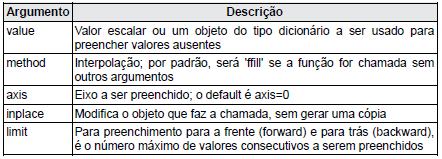

## Removendo duplicatas
---

In [58]:
data = pd.DataFrame({'k1': ['one', 'two'] * 3 + ['two'], 'k2': [1, 1, 2, 3, 3, 4, 4]})
data

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4
6,two,4


O método [duplicated](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.duplicated.html) de DataFrame devolve uma Series booleana
informando se cada linha é uma duplicata (foi observada em uma
linha anterior) ou não:

In [59]:
data.duplicated()

0    False
1    False
2    False
3    False
4    False
5    False
6     True
dtype: bool

Relacionado a esse caso, temos [drop_duplicates](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop_duplicates.html), que devolve um
DataFrame com dados em que o array duplicated é False:

In [60]:
data.drop_duplicates()

,k1,k2
0,one,1
1,two,1
2,one,2
3,two,3
4,one,3
5,two,4


Por padrão, esses dois métodos consideram todas as colunas; de
forma alternativa, podemos especificar qualquer subconjunto delas
na detecção de duplicatas. Suponha que tivéssemos uma coluna
adicional de valores e quiséssemos filtrar as duplicatas somente
com base na coluna 'k1':

In [62]:
data['v1'] = range(7)
data

,k1,k2,v1
0,one,1,0
1,two,1,1
2,one,2,2
3,two,3,3
4,one,3,4
5,two,4,5
6,two,4,6


In [63]:
data.drop_duplicates(['k1'])

,k1,k2,v1
0,one,1,0
1,two,1,1


## Transformando dados usando uma função ou um mapeamento
---

In [65]:
data = pd.DataFrame({'food': ['bacon', 'pulled pork', 'bacon',
... 'Pastrami', 'corned beef', 'Bacon',
... 'pastrami', 'honey ham', 'nova lox'],
... 'ounces': [4, 3, 12, 6, 7.5, 8, 3, 5, 6]})
data

,food,ounces
0,bacon,4.0
1,pulled pork,3.0
2,bacon,12.0
3,Pastrami,6.0
4,corned beef,7.5
5,Bacon,8.0
6,pastrami,3.0
7,honey ham,5.0
8,nova lox,6.0


Suponha que quiséssemos adicionar uma coluna informando o tipo
do animal do qual cada alimento é proveniente. Vamos criar um
mapeamento entre cada tipo distinto de carne e o tipo do animal:

In [73]:
meat_to_animal = {
'bacon': 'pig',
'pulled pork': 'pig',
'pastrami': 'cow',
'corned beef': 'cow',
'honey ham': 'pig',
'nova lox': 'salmon'
}

O método [map](https://pandas.pydata.org/docs/reference/api/pandas.Series.map.html) em uma Series aceita uma função ou um objeto do
tipo dicionário contendo um mapeamento; nesse caso, porém,
temos um pequeno problema, pois algumas das carnes utilizam letra
inicial maiúscula enquanto outras não. Desse modo, precisamos
converter todos os valores para letras minúsculas utilizando o
método `str.lower` de Series:

In [75]:
lowercase = data.food.str.lower()
lowercase

0          bacon
1    pulled pork
2          bacon
3       pastrami
4    corned beef
5          bacon
6       pastrami
7      honey ham
8       nova lox
Name: food, dtype: object

In [76]:
data['animal'] = lowercase.map(meat_to_animal)
data

,food,ounces,animal
0,bacon,4.0,pig
1,pulled pork,3.0,pig
2,bacon,12.0,pig
3,Pastrami,6.0,cow
4,corned beef,7.5,cow
5,Bacon,8.0,pig
6,pastrami,3.0,cow
7,honey ham,5.0,pig
8,nova lox,6.0,salmon


Poderíamos também ter passado uma função que fizesse todo o
trabalho:

In [77]:
data['food'].map(lambda x: meat_to_animal[x.lower()])

0       pig
1       pig
2       pig
3       cow
4       cow
5       pig
6       cow
7       pig
8    salmon
Name: food, dtype: object

In [79]:
data.ounces.map(np.sqrt) # aplicando raiz quadrada na Series ounces

0    2.000000
1    1.732051
2    3.464102
3    2.449490
4    2.738613
5    2.828427
6    1.732051
7    2.236068
8    2.449490
Name: ounces, dtype: float64

In [86]:
data.ounces.map(lambda x: abs(x - data.ounces.mean())) # calculando a variância

0    2.055556
1    3.055556
2    5.944444
3    0.055556
4    1.444444
5    1.944444
6    3.055556
7    1.055556
8    0.055556
Name: ounces, dtype: float64

In [87]:
data.ounces.apply(lambda x: abs(x - data.ounces.mean())) # outra forma de utilizar funções

0    2.055556
1    3.055556
2    5.944444
3    0.055556
4    1.444444
5    1.944444
6    3.055556
7    1.055556
8    0.055556
Name: ounces, dtype: float64

## Substituindo valores
---

Preencher dados ausentes com o método fillna é um caso especial
da substituição mais genérica de valores. Conforme já vimos, map
pode ser usado para modificar um subconjunto de valores em um
objeto, porém replace oferece uma forma mais simples e mais flexível
de fazer isso. Considere a Series a seguir:

In [4]:
data = pd.Series([1., -999., 2., -999., -1000., 3.])
data

0       1.0
1    -999.0
2       2.0
3    -999.0
4   -1000.0
5       3.0
dtype: float64

Os valores -999 podem ser valores de sentinela para dados
ausentes. Para substituí-los por valores NA, compreensíveis pelo
pandas, podemos usar [replace](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.replace.html), gerando uma nova Series (a menos
que você passe inplace=True)

In [5]:
data.replace(-999,np.nan)

0       1.0
1       NaN
2       2.0
3       NaN
4   -1000.0
5       3.0
dtype: float64

Se você quiser substituir diversos valores de uma só vez, passe
uma lista e, em seguida, o valor para substituição:

In [6]:
data.replace([-999, -1000], np.nan)

0    1.0
1    NaN
2    2.0
3    NaN
4    NaN
5    3.0
dtype: float64

Para usar um substituto diferente para cada valor, passe uma lista
deles:

In [7]:
data.replace([-999, -1000], [np.nan, 0])

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

O argumento especificado também pode ser um dicionário:

In [8]:
data.replace({-999: np.nan, -1000: 0})

0    1.0
1    NaN
2    2.0
3    NaN
4    0.0
5    3.0
dtype: float64

**OBS**: O método data.replace é diferente de data.str.replace, que faz uma
substituição de string em todos os elementos.

In [9]:
# relembrando o método de string replace
letra = 'Ragnarok'
letra

'Ragnarok'

In [10]:
letra.replace('R','C')

'Cagnarok'

## Renomenado os índices dos eixos
---

Assim como os valores em uma Series, os rótulos dos eixos podem
ser transformados de modo semelhante por uma função ou alguma
forma de mapeamento, a fim de gerar objetos novos com rótulos
diferentes. Também podemos modificar os eixos in-place, sem criar
uma nova estrutura de dados.

In [13]:
data = pd.DataFrame(np.arange(12).reshape((3, 4)),
... index=['Ohio', 'Colorado', 'New York'],
... columns=['one', 'two', 'three', 'four'])
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
New York,8,9,10,11


In [14]:
transform = lambda x: x[:4].upper()

In [15]:
data.index.map(transform)

Index(['OHIO', 'COLO', 'NEW '], dtype='object')

In [16]:
data.index = data.index.map(transform)

In [17]:
data

,one,two,three,four
OHIO,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


Se você quiser criar uma versão transformada de um conjunto de
dados sem modificar os dados originais, um método útil será [rename](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.rename.html):

In [18]:
data.rename(index = str.title, columns=str.upper)

,ONE,TWO,THREE,FOUR
Ohio,0,1,2,3
Colo,4,5,6,7
New,8,9,10,11


Observe que rename pode ser usado em conjunto com um objeto do
tipo dicionário fornecendo novos valores para um subconjunto dos
rótulos de um eixo:

In [19]:
data.rename(index={'OHIO': 'INDIANA'},
... columns={'three': 'peekaboo'})

,one,two,peekaboo,four
INDIANA,0,1,2,3
COLO,4,5,6,7
NEW,8,9,10,11


## Discretização e compartimentalização (binning)
---

Dados contínuos com frequência são discretizados ou, de modo
alternativo, separados em “compartimentos” (bins) para análise.
Suponha que tenhamos dados sobre um grupo de pessoas em um
estudo e queremos agrupá-las em conjuntos de idades discretas:

In [22]:
ages = [20, 22, 25, 27, 21, 23, 37, 31, 61, 45, 41, 32]

Vamos dividir esses dados em compartimentos de 18 a 25, 26 a 35,
36 a 60 e, por fim, 61 anos ou mais. Para isso, utilize [cut](https://pandas.pydata.org/docs/reference/api/pandas.cut.html), uma
função do pandas:

In [23]:
bins = [18,25,35,60,100]

In [26]:
cats = pd.cut(ages,bins)
cats

[(18, 25], (18, 25], (18, 25], (25, 35], (18, 25], ..., (25, 35], (60, 100], (35, 60], (35, 60], (25, 35]]
Length: 12
Categories (4, interval[int64]): [(18, 25] < (25, 35] < (35, 60] < (60, 100]]

O objeto devolvido pelo pandas é um objeto Categorical especial. A
saída que vemos descreve os compartimentos calculados pelo
pandas.cut. Podemos tratá-la como um array de strings informando o
nome do compartimento; internamente, ela contém um array
categories que especifica os nomes distintos das categorias, junto
com rótulos para os dados de ages no atributo codes:

In [27]:
cats.codes

array([0, 0, 0, 1, 0, 0, 2, 1, 3, 2, 2, 1], dtype=int8)

In [28]:
cats.categories

IntervalIndex([(18, 25], (25, 35], (35, 60], (60, 100]],
              closed='right',
              dtype='interval[int64]')

In [29]:
pd.value_counts(cats)

(18, 25]     5
(25, 35]     3
(35, 60]     3
(60, 100]    1
dtype: int64

**(** $\rightarrow$ intervalo aberto

**[**  $\rightarrow$ intervalo fechado

De forma consistente com a notação matemática para intervalos, um
parêntese significa que o lado está aberto, enquanto o colchete
indica que está fechado (é inclusivo). Podemos alterar o lado que
está fechado passando right=False:

In [30]:
pd.cut(ages, [18, 26, 36, 61, 100], right=False)

[[18, 26), [18, 26), [18, 26), [26, 36), [18, 26), ..., [26, 36), [61, 100), [36, 61), [36, 61), [26, 36)]
Length: 12
Categories (4, interval[int64]): [[18, 26) < [26, 36) < [36, 61) < [61, 100)]

Também podemos especificar nossos próprios nomes de
compartimentos passando uma lista ou um array para a opção labels:

In [31]:
group_names = ['Youth', 'YoungAdult', 'MiddleAged', 'Senior']

In [32]:
pd.cut(ages, bins, labels=group_names)

['Youth', 'Youth', 'Youth', 'YoungAdult', 'Youth', ..., 'YoungAdult', 'Senior', 'MiddleAged', 'MiddleAged', 'YoungAdult']
Length: 12
Categories (4, object): ['Youth' < 'YoungAdult' < 'MiddleAged' < 'Senior']

Se passarmos um número inteiro de compartimentos para cut, em
vez de passar fronteiras explícitas, ele calculará compartimentos de
tamanhos iguais com base nos valores mínimo e máximo dos
dados. Considere o caso de alguns dados uniformemente
distribuídos, divididos em quartos:

In [33]:
data = np.random.rand(20)

In [34]:
pd.cut(data, 4, precision=2)

[(0.26, 0.48], (0.26, 0.48], (0.26, 0.48], (0.48, 0.7], (0.26, 0.48], ..., (0.26, 0.48], (0.037, 0.26], (0.7, 0.92], (0.7, 0.92], (0.7, 0.92]]
Length: 20
Categories (4, interval[float64]): [(0.037, 0.26] < (0.26, 0.48] < (0.48, 0.7] < (0.7, 0.92]]

A opção `precision=2` limita a precisão decimal em dois dígitos.
Uma função intimamente relacionada, [qcut](https://pandas.pydata.org/docs/reference/api/pandas.qcut.html), compartimenta os dados
com base nos quantis da amostra. Conforme a distribuição dos
dados, usar cut em geral não resultará em cada compartimento com
o mesmo número de pontos de dados. Como qcut utiliza quantis da
amostra, por definição, você obterá compartimentos grosseiramente
de mesmo tamanho:

In [36]:
data = np.random.randn(1000) # Normalmente distribuídos

In [38]:
cats = pd.qcut(data, 4) # Separa em quantis
cats

[(-3.133, -0.67], (-3.133, -0.67], (0.682, 3.725], (0.682, 3.725], (-0.00488, 0.682], ..., (-3.133, -0.67], (0.682, 3.725], (0.682, 3.725], (-0.67, -0.00488], (-0.67, -0.00488]]
Length: 1000
Categories (4, interval[float64]): [(-3.133, -0.67] < (-0.67, -0.00488] < (-0.00488, 0.682] < (0.682, 3.725]]

In [39]:
pd.value_counts(cats)

(-3.133, -0.67]      250
(-0.67, -0.00488]    250
(-0.00488, 0.682]    250
(0.682, 3.725]       250
dtype: int64

De modo semelhante a cut, podemos passar nossos próprios quantis
(números entre 0 e 1, inclusive):

In [40]:
pd.qcut(data, [0, 0.1, 0.5, 0.9, 1.])

[(-1.268, -0.00488], (-3.133, -1.268], (1.265, 3.725], (1.265, 3.725], (-0.00488, 1.265], ..., (-3.133, -1.268], (1.265, 3.725], (1.265, 3.725], (-1.268, -0.00488], (-1.268, -0.00488]]
Length: 1000
Categories (4, interval[float64]): [(-3.133, -1.268] < (-1.268, -0.00488] < (-0.00488, 1.265] < (1.265, 3.725]]

## Detectando e filtrando valores discrepantes
---

Filtrar ou transformar valores discrepantes **(outliers)** é, em boa
medida, uma questão de aplicar operações de array. Considere um
DataFrame com alguns dados normalmente distribuídos:

In [41]:
data = pd.DataFrame(np.random.randn(1000, 4))

In [42]:
data.describe()

,0,1,2,3
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.012917,-0.013361,-0.006238,0.024644
std,0.991988,0.980378,1.044887,0.972823
min,-3.836348,-3.287518,-3.348320,-3.230354
25%,-0.689792,-0.658642,-0.721712,-0.637531
50%,-0.055441,-0.012069,-0.030545,0.008278
75%,0.633175,0.702070,0.677046,0.691846
max,3.092069,3.197255,3.231777,3.010584


Suponha que quiséssemos encontrar os valores que excedessem 3
em valor absoluto em uma das colunas:

In [44]:
col = data[2] # queremos verificar quais valores são maior que três em módulo

In [45]:
col[np.abs(col)>3]

125   -3.224879
291   -3.348320
385   -3.124051
789    3.231777
Name: 2, dtype: float64

Para selecionar todas as linhas que tenham um valor que exceda 3
ou –3, podemos utilizar o método any em um DataFrame booleano:

In [47]:
data[(np.abs(data) > 3).any(1)]

,0,1,2,3
42,0.815462,-3.125678,1.651093,0.947768
125,1.172826,1.454403,-3.224879,0.249235
191,-0.521588,3.197255,-1.040604,1.000398
222,-1.297322,-3.287518,-0.010484,-0.497120
291,1.446913,-0.807819,-3.348320,0.430838
385,0.038583,0.352480,-3.124051,1.357400
424,-0.512190,-0.307188,0.260679,-3.230354
644,-3.614486,-0.808980,-0.262634,1.252298
753,-3.836348,0.736059,-1.998035,-2.025658
782,-0.945094,-0.526549,-0.425353,3.010584


## Permutação e amostragem aleatória
---

Permutar (reordenar aleatoriamente) uma Series ou as linhas de um
DataFrame é fácil utilizando a função numpy.random.permutation.
Chamar permutation com o tamanho do eixo que você quer permutar
gera um array de inteiros informando a nova ordem:



In [48]:
df = pd.DataFrame(np.arange(5 * 4).reshape((5, 4)))

In [50]:
sampler = np.random.permutation(5)
sampler

array([0, 2, 4, 3, 1])

In [51]:
df

,0,1,2,3
0,0,1,2,3
1,4,5,6,7
2,8,9,10,11
3,12,13,14,15
4,16,17,18,19


Esse array pode então ser usado na indexação baseada em iloc ou
na função [take](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.take.html) equivalente:

In [52]:
df.take(sampler)

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7


In [53]:
df.iloc[sampler]

,0,1,2,3
0,0,1,2,3
2,8,9,10,11
4,16,17,18,19
3,12,13,14,15
1,4,5,6,7


Para selecionar um subconjunto aleatório sem substituição, o
método [sample](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.sample.html) pode ser usado em Series e em DataFrame:

In [59]:
df.sample(n=3)

,0,1,2,3
2,8,9,10,11
4,16,17,18,19
3,12,13,14,15


Para gerar uma amostra com substituição (a fim de permitir opções
repetidas), passe replace=True para sample:

In [61]:
choices = pd.Series([5, 7, -1, 6, 4])
draws = choices.sample(n=10, replace=True)
draws

0    5
2   -1
4    4
2   -1
1    7
4    4
3    6
4    4
1    7
1    7
dtype: int64

## Calculando variáveis indicadoras/dummy
---
Outro tipo de transformação para modelagem estatística ou
aplicações de aprendizado de máquina (machine learning) consiste
em converter uma variável de categorias em uma matriz “dummy”
ou “indicadora”. Se uma coluna em um DataFrame tiver k valores
distintos, poderíamos derivar uma matriz ou um DataFrame com k
colunas contendo somente 1s e 0s. O pandas tem uma função
[get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html) para isso, embora criar uma função por conta própria
não seria difícil. Vamos retomar um exemplo anterior com

In [2]:
df = pd.DataFrame({'key': ['b', 'b', 'a', 'c', 'a', 'b'],
... 'data1': range(6)})
df

,key,data1
0,b,0
1,b,1
2,a,2
3,c,3
4,a,4
5,b,5


In [3]:
pd.get_dummies(df['key'])

,a,b,c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


Em alguns casos, talvez você queira adicionar um prefixo às
colunas no DataFrame indicador, que poderá então ser mesclado
com os outros dados. get_dummies tem um argumento de prefixo para
isso:

In [5]:
dummies = pd.get_dummies(df['key'], prefix='key')
dummies

,key_a,key_b,key_c
0,0,1,0
1,0,1,0
2,1,0,0
3,0,0,1
4,1,0,0
5,0,1,0


In [6]:
df_with_dummy = df[['data1']].join(dummies)
df_with_dummy

,data1,key_a,key_b,key_c
0,0,0,1,0
1,1,0,1,0
2,2,1,0,0
3,3,0,0,1
4,4,1,0,0
5,5,0,1,0


## Manipulação de strings
---

Python tem sido uma linguagem popular para manipulação de dados
brutos há muito tempo, em parte por causa de sua facilidade de uso
para processamento de strings e de texto. A maior parte das
operações em texto são simplificadas com os métodos embutidos
do objeto string. Para uma correspondência de padrões e
manipulações de texto mais complexas, o uso de expressões
regulares talvez seja necessário. O pandas complementa a mistura
permitindo aplicar strings e expressões regulares de forma concisa
em arrays inteiros de dados, além de lidar com o transtorno dos
dados ausentes.

* **Métodos de objetos string:** Para muitas aplicações de manipulação de strings e de scripting, os
métodos embutidos de string são suficientes. Como exemplo, uma
string separada por vírgulas pode ser dividida em partes usando
split:

In [8]:
val = 'a,b, guido'
val

'a,b, guido'

In [12]:
val.split(',') # sem a remoção do espaço em branco na string ' guido'

['a', 'b', ' guido']

Com frequência, split é usado em conjunto com strip para remover espaços em
branco (incluindo quebras de linha):

In [11]:
pieces = [x.strip() for x in val.split(',')]
pieces

['a', 'b', 'guido']

In [13]:
first, second, third = pieces

In [14]:
first + '::' + second + '::' + third

'a::b::guido'

No entanto, esse não é um método genérico prático. Uma forma
mais rápida e pythônica consiste em passar uma lista ou uma tupla
para o método join na string '::':

In [15]:
'::'.join(pieces)

'a::b::guido'

Outros métodos dizem respeito à localização de substrings. Usar a
palavra reservada in de Python é a melhor maneira de detectar uma
substring, embora index e find também possam ser utilizados:

In [17]:
val

'a,b, guido'

In [18]:
'guido' in val

True

In [21]:
val.index(',')

1

In [23]:
val.find(':') # -1 -> indica que não foi encontrado

-1

In [24]:
val.count(',') # retorna o número de ocorrências de uma substring em particular.

2

**replace** substituirá as ocorrências de um padrão por outro. É
comumente utilizado também para apagar padrões, passando uma
string vazia:

In [25]:
val.replace(',','::')

'a::b:: guido'

In [26]:
val.replace(',','')

'ab guido'

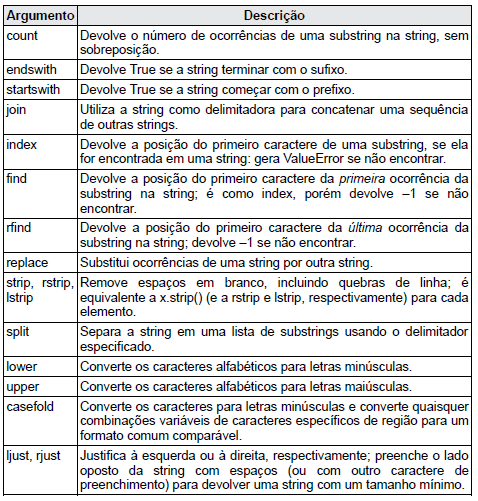

## Expressões regulares
---

* Uma breve introdução sobre expressões regulares:

> correspondência;

> substituição;

> separação.

In [1]:
import re

In [2]:
string = 'Este é um teste de expressões teste regulares'

In [3]:
re.search(r'teste', string) #  r'digite seu texto aqui' é para ser uma entrda crua

<re.Match object; span=(10, 15), match='teste'>

In [4]:
re.findall(r'teste',string)

['teste', 'teste']

In [5]:
re.sub(r'teste','ABCD',string)

'Este é um ABCD de expressões ABCD regulares'

In [6]:
regexp = re.compile(r'teste')

In [7]:
regexp.search(string)

<re.Match object; span=(10, 15), match='teste'>

In [8]:
regexp.findall(string)

['teste', 'teste']

In [9]:
regexp.sub('DEF',string)

'Este é um DEF de expressões DEF regulares'

Vamos analisar um exemplo simples: suponha
que quiséssemos separar uma string com um número variável de
caracteres de espaços em branco (tabulações, espaços e quebras
de linha). A regex que descreve um ou mais caracteres para
espaços em branco é **\s+**:

In [10]:
text = "foo bar\t baz \tqux"

In [11]:
re.split('\s+', text)

['foo', 'bar', 'baz', 'qux']

Quando chamamos re.split('\s+', text), a expressão regular inicialmente
é compilada; então seu método split é chamado no texto que lhe é
passado. Podemos compilar a regex por conta própria com
re.compile, criando um objeto regex reutilizável:

In [12]:
regex = re.compile('\s+')

In [13]:
regex.split(text)

['foo', 'bar', 'baz', 'qux']

In [14]:
regex.findall(text)

[' ', '\t ', ' \t']